# Exploratory Analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time # For benchmarking
from functools import partial # For benchmarking
def benchmark(f):
    start = time()
    to_return = f()
    end = time()
    print ("The function took %s to run." % str(end - start))
    return to_return
    

Loading the training and testing dataset into a Pandas Dataframe.

In [59]:
# Load training data
dfTrain = pd.DataFrame.from_csv('train.tsv', sep='\t')
from sklearn.model_selection import train_test_split
dfTrain, dfValidate, dfTrainTarget, dfValidateTarget = train_test_split(dfTrain.drop('price',1), dfTrain['price'], test_size=0.33, random_state=42)
dfTrainTarget = pd.DataFrame(dfTrainTarget)
dfValidateTarget = pd.DataFrame(dfValidateTarget)
dfTest = pd.DataFrame.from_csv('test.tsv',sep='\t')

In [55]:
dfTrain.head(5)

,name,item_condition_id,category_name,brand_name,shipping,item_description
train_id,,,,,,
223243,FUNKO POP OVERWATCH DVA CARBON FIBER MEC,1,Kids/Toys/Action Figures & Statues,Funko,1,New dva with carbon meka Free shipping
363758,Mocha jumpsuit new never worn,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,1,"New cotton + spandex jumpsuit I have hot pink,..."
1358119,Leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,0,"Sexy Butt Lifting Leggings Sexy, youthful, fig..."
198564,Nike huarache sneakers,3,Kids/Boys (4+)/Shoes,Nike,0,Very good condition huaraches. Size 5.5y in ki...
71297,Lularoe XS Joy,1,"Women/Sweaters/Vest, Sleeveless",LuLaRoe,0,Bought and never wore


In [60]:
# In this chunk we split the category into a hierarchical system of subcategories.
def split_category(x, colname,sep):
    x2 = x[colname].str.split(sep, expand=True).astype(str) # Split the column category_name on the character '/'
    cat_names =  ['cat_' + str(i) for i in range(len(x2.columns))] # Iterate over new cols and name 'cat_' 
    x2.columns = cat_names # Assign cats to columns
    x = pd.concat([x,x2],axis=1) # Concatenate two data frames
    return x

dfTrain = benchmark(partial(split_category, dfTrain, 'category_name','/'))
dfTest = split_category(dfTest, 'category_name','/')

dfTrain.head(5)

The function took 4.158729076385498 to run.


,name,item_condition_id,category_name,brand_name,shipping,item_description,cat_0,cat_1,cat_2,cat_3,cat_4
train_id,,,,,,,,,,,
223243,FUNKO POP OVERWATCH DVA CARBON FIBER MEC,1,Kids/Toys/Action Figures & Statues,Funko,1,New dva with carbon meka Free shipping,Kids,Toys,Action Figures & Statues,None,None
363758,Mocha jumpsuit new never worn,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,1,"New cotton + spandex jumpsuit I have hot pink,...",Women,Athletic Apparel,"Pants, Tights, Leggings",None,None
1358119,Leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,0,"Sexy Butt Lifting Leggings Sexy, youthful, fig...",Women,Athletic Apparel,"Pants, Tights, Leggings",None,None
198564,Nike huarache sneakers,3,Kids/Boys (4+)/Shoes,Nike,0,Very good condition huaraches. Size 5.5y in ki...,Kids,Boys (4+),Shoes,None,None
71297,Lularoe XS Joy,1,"Women/Sweaters/Vest, Sleeveless",LuLaRoe,0,Bought and never wore,Women,Sweaters,"Vest, Sleeveless",None,None


In [64]:
print (dfTrain['cat_3'].unique())
print (dfTrain['cat_4'].unique())

['None' 'Tablet' 'Ballet' 'Bomber' 'Outdoor Games' 'Baseball' 'Serving']
['None' 'eBook Access' 'eBook Readers']


In [68]:
print('There are %s main categories in the data set. Namely: \n' 
      % dfTrain['cat_0'].nunique(),
     ', '.join(dfTrain['cat_0'].unique()))
print('There are %s middle categories in the data set.' % dfTrain['cat_1'].nunique())
print('There are %s low-level categories in the data set.' % dfTrain['cat_2'].nunique())
mainMidRatio = round(dfTrain['cat_1'].nunique() / dfTrain['cat_0'].nunique(),2)
print('That is an average of %s middle categories per main category.' %  mainMidRatio)
mainLowRatio = round(dfTrain['cat_2'].nunique() / dfTrain['cat_0'].nunique(),2)
print('That is an average of %s low-level categories per main category.' % mainLowRatio)

dfTrain.groupby(['cat_0','cat_1','cat_2']).size()

There are 11 main categories in the data set. Namely: 
 Kids, Women, Men, Home, Beauty, Electronics, Handmade, nan, Other, Sports & Outdoors, Vintage & Collectibles
There are 114 middle categories in the data set.
There are 852 low-level categories in the data set.
That is an average of 10.36 middle categories per main category.
That is an average of 77.45 low-level categories per main category.


cat_0   cat_1                cat_2                     
Beauty  Bath & Body          Bath                           3379
                             Bathing Accessories             236
                             Cleansers                       476
                             Other                           100
                             Scrubs & Body Treatments        560
                             Sets                            454
        Fragrance            Candles & Home Scents          1982
                             Kids                             61
                             Men                            1444
                             Other                            25
                             Sets                            307
                             Women                         12466
        Hair Care            Conditioners                    326
                             Hair & Scalp Treatments         836
                             Hair 

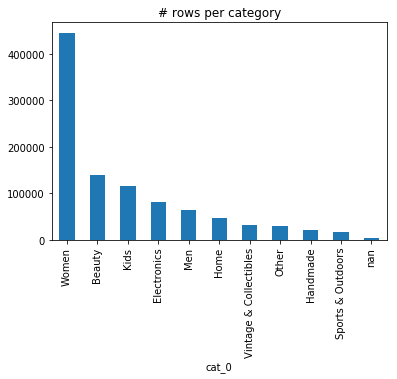

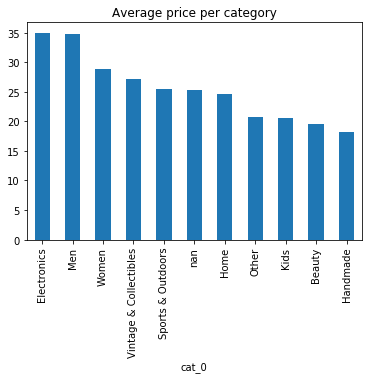

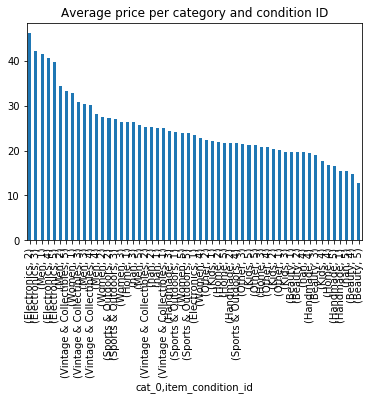

In [71]:
dfTrain.groupby('cat_0').size().sort_values(ascending=False).plot(kind='bar')
plt.title('# rows per category')
plt.show()
pd.concat([dfTrain,dfTrainTarget],axis=1).groupby('cat_0')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average price per category')
plt.show()
pd.concat([dfTrain,dfTrainTarget],axis=1).groupby(['cat_0','item_condition_id'])['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average price per category and condition ID')
plt.show()

In [37]:
print('There are %s brands in the data set.' % dfTrain.groupby(['brand_name']).size().count())
print(dfTrain.groupby(['brand_name']).size().sort_values(ascending=False))


There are 4326 brands in the data set.
brand_name
Nike                    36338
PINK                    36224
Victoria's Secret       32247
LuLaRoe                 20781
Apple                   11590
FOREVER 21              10196
Nintendo                 9923
Lululemon                9707
Michael Kors             9333
American Eagle           8909
Rae Dunn                 8267
Sephora                  8164
Coach                    7002
Disney                   6986
Bath & Body Works        6918
Adidas                   6801
Funko                    6212
Under Armour             5643
Sony                     5364
Old Navy                 5129
Hollister                4607
Carter's                 4258
Urban Decay              4156
The North Face           4064
Independent              3972
Too Faced                3871
Xbox                     3815
Brandy Melville          3810
Kate Spade               3580
MAC                      3566
                        ...  
Katia               